This is some interesting maths...

$\sum{}_{i=1}^{n} i = \frac{n(n+1)}{2}$

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from import_OMNI import read_OMNI, nan_value
from entropy import H, MI, CMI, entropy_matrix
from storm_selection import findSeq

%matplotlib widget
%matplotlib inline

In [2]:
df = read_OMNI(
    filepath="../datasets/test_2.txt",
    formatpath="../data_format/test_2_format.txt",
)
print(list(df))


c:\Users\Aarnav\Downloads\UROP2024\UROP2024\src\import_OMNI.py:39: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


['Datetime', 'Field magnitude average, nT', 'BX, nT (GSE, GSM)', 'BY, nT (GSE)', 'BZ, nT (GSE)', 'BY, nT (GSM)', 'BZ, nT (GSM)', 'RMS SD B scalar, nT', 'RMS SD field vector, nT', 'Speed, km/s', 'Vx Velocity,km/s', 'Vy Velocity, km/s', 'Vz Velocity, km/s', 'Proton Density, n/cc', 'Proton Temperature, K', 'Na/Np Ratio', 'Flow pressure, nPa', 'Electric field, mV/m', 'Plasma beta', 'Alfven mach number', 'Magnetosonic Mach number', 'AE-index, nT', 'AL-index, nT', 'AU-index, nT', 'SYM/D, nT', 'SYM/H, nT', 'ASY/D, nT', 'ASY/H, nT']


In [8]:
# for column in list(df)[1:]:
    plt.plot(df["Datetime"], df[column], label=column)
# plt.plot(df["Datetime"], df["BZ"], label="BZ")
# plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
# plt.hist(df["SYM/H"], 150)
plt.legend()
plt.show()

In [4]:
entropy_matrix(df)

array([[ 5.56700277e+00,  4.76550940e-01,  7.75912188e-01,
         4.65240388e-01,  7.16454127e-01,  5.14914179e-01,
         3.18967393e-02,  4.64568890e-02,  1.86554702e-01,
         1.84872292e-01,  1.12237294e-01,  8.29883804e-02,
         2.20384383e-01,  7.25417822e-02, -1.30503705e-01,
         2.82947617e-01,  4.04215494e-01,  1.73673045e-01,
         5.95308202e-01,  4.90077146e-01,  7.63769163e-02,
         4.99027134e-03, -4.85688134e-01,  8.49312183e-02,
         1.09661581e-01, -5.43706371e-01,  1.89551315e-01],
       [ 4.76550940e-01,  5.88428560e+00,  2.92087478e-01,
         9.49979135e-02,  2.70216980e-01,  9.50490094e-02,
         1.83921411e-02,  2.57181429e-02,  1.38580899e-01,
         1.37069142e-01,  9.85707017e-02,  5.51780506e-02,
         1.00952698e-01,  6.59432284e-02, -2.11263270e-01,
         1.25933945e-01,  9.55857736e-02,  4.58901709e-02,
         1.66896250e-01,  1.71409778e-01, -2.44028364e-02,
        -6.98586971e-02, -5.86436410e-01,  4.43117253e-

In [5]:
inds, ranges=findSeq(-df["SYM/H, nT"],20,100,6*60, return_ranges=True)
# plt.plot(df["Datetime"], df["SYM/H, nT"])
inds


Min / max thresholds are: 20.00 , 100.00
15 sequences found.
Joining two sequences next to each other (within the threshold).
Joining two sequences next to each other (within the threshold).


[29677,
 29678,
 29679,
 29680,
 29681,
 29682,
 29683,
 29684,
 29685,
 29686,
 29687,
 29688,
 29689,
 29690,
 29691,
 29692,
 29693,
 29694,
 29695,
 29696,
 29697,
 29698,
 29699,
 29700,
 29701,
 29702,
 29703,
 29704,
 29705,
 29706,
 29707,
 29708,
 29709,
 29710,
 29711,
 29712,
 29713,
 29714,
 29715,
 29716,
 29717,
 29718,
 29719,
 29720,
 29721,
 29722,
 29723,
 29724,
 29725,
 29726,
 29727,
 29728,
 29729,
 29730,
 29731,
 29732,
 29733,
 29734,
 29735,
 29736,
 29737,
 29738,
 29739,
 29740,
 29741,
 29742,
 29743,
 29744,
 29745,
 29746,
 29747,
 29748,
 29749,
 29750,
 29751,
 29752,
 29753,
 29754,
 29755,
 29756,
 29757,
 29758,
 29759,
 29760,
 29761,
 29762,
 29763,
 29764,
 29765,
 29766,
 29767,
 29768,
 29769,
 29770,
 29771,
 29772,
 29773,
 29774,
 29775,
 29776,
 29777,
 29778,
 29779,
 29780,
 29781,
 29782,
 29783,
 29784,
 29785,
 29786,
 29787,
 29788,
 29789,
 29790,
 29791,
 29792,
 29793,
 29794,
 29795,
 29796,
 29797,
 29798,
 29799,
 29800,
 29801,


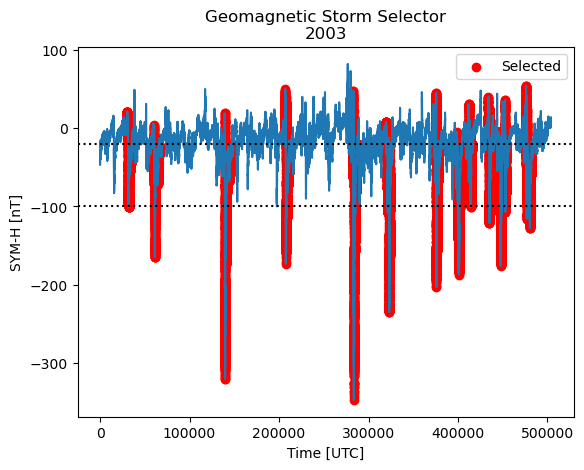

In [6]:
plt.figure()
plt.plot(df["SYM/H, nT"])
plt.scatter(df["Datetime"].iloc[inds].index,df["SYM/H, nT"].iloc[inds],color='r',label='Selected')
plt.axhline(-20,color='k',linestyle=':')
plt.axhline(-100,color='k',linestyle=':')
plt.title('Geomagnetic Storm Selector\n2003')
plt.xlabel('Time [UTC]')
plt.ylabel('SYM-H [nT]')

plt.legend()
plt.show()

In [7]:
ranges

[(29677, 35630),
 (59757, 65792),
 (138525, 147325),
 (206364, 211536),
 (282424, 287699),
 (318746, 324190),
 (374848, 377769),
 (398116, 404307),
 (411033, 415577),
 (433331, 437326),
 (444866, 448991),
 (451833, 454198),
 (475380, 482400)]